In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix
from sklearn import datasets, linear_model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn import svm
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix  
from sklearn import metrics
from time import time
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,spent
0,975a85121307cc94c5f0d1927b06e981c945d87bd4ac40...,4/4/2015,20/04/15,23/04/15,3,3,3,0,45,2,...,7,4,D,1,c4135bd807f63d72714d9f3508f3cc0bae1e26a7277155...,C,A,da4ea2a5506f2693eae190d9360a1f31793c98a1adade5...,4.562889,low
1,59850ab51a38a313960b2288c592144cc55d876bcfeda2...,12/10/2016,27/10/16,30/10/16,3,3,3,0,46,1,...,6,4,D,1,c4135bd807f63d72714d9f3508f3cc0bae1e26a7277155...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...,8.031742,high
2,788d4c4fed9b5c04a3cd85c80d2e8f82c72767f42f194e...,12/10/2016,30/10/16,1/11/2016,3,3,3,0,46,1,...,4,4,D,1,c4135bd807f63d72714d9f3508f3cc0bae1e26a7277155...,F,A,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...,7.154651,low
3,6b4349c32e2eb82ee708cb44833cf73aa679974b8d8c73...,1/12/2017,30/12/17,2/1/2018,3,3,3,0,46,1,...,11,2,D,1,c4135bd807f63d72714d9f3508f3cc0bae1e26a7277155...,F,A,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...,8.367164,high
4,1f40514f9642a91945f951c9a9a54283a57c04bedced83...,2/1/2015,3/4/2015,6/4/2015,3,3,2,0,45,3,...,3,3,C,2,86c37ecfa0e476dcdd12d172fc330476d3a92ed43ba256...,A,A,9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739...,7.621465,low


In [4]:
train.describe()

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,booking_type_code,amount_spent_per_room_night_scaled
count,308004.000000,308004.000000,308004.000000,308004.000000,308004.000000,308004.000000,308004.000000,308004.000000,308004.000000,307896.000000,303542.000000,308004.000000,308004.000000,308004.000000,308004.000000
mean,1.911647,2.221867,3.279500,0.358736,209.575385,1.771584,2.186679,2.886687,3.722146,2.672571,7.284913,4.761532,3.203806,1.131316,7.730689
std,0.913631,0.826058,1.757395,0.754486,863.945911,0.751875,1.546612,0.803701,2.478043,0.886909,4.752278,3.099763,1.170541,0.337747,1.093593
min,1.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000,1.000000,-45.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.600397
25%,1.000000,2.000000,2.000000,0.000000,45.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,7.196778
50%,2.000000,2.000000,3.000000,0.000000,45.000000,2.000000,2.000000,3.000000,3.000000,3.000000,8.000000,5.000000,3.000000,1.000000,7.873165
75%,3.000000,3.000000,4.000000,0.000000,45.000000,2.000000,3.000000,3.000000,4.000000,3.000000,8.000000,7.000000,4.000000,1.000000,8.430543
max,3.000000,7.000000,32.000000,13.000000,4995.000000,3.000000,7.000000,6.000000,60.000000,4.000000,38.000000,13.000000,24.000000,2.000000,10.816652


In [5]:
train.dtypes

id                                     object
booking_date                           object
checkin_date                           object
checkout_date                          object
channel_code                            int64
main_product_code                       int64
numberofadults                          int64
numberofchildren                        int64
persontravellingid                      int64
resort_region_code                      int64
resort_type_code                        int64
room_type_booked_code                   int64
roomnights                              int64
season_holidayed_code                 float64
state_code_residence                  float64
state_code_resort                       int64
total_pax                               int64
member_age_buckets                     object
booking_type_code                       int64
memberid                               object
cluster_code                           object
reservationstatusid_code          

In [6]:
train.columns.values

array(['id', 'booking_date', 'checkin_date', 'checkout_date',
       'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence',
       'state_code_resort', 'total_pax', 'member_age_buckets',
       'booking_type_code', 'memberid', 'cluster_code',
       'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled', 'spent'], dtype=object)

In [7]:
# encoding low and high spend into numeric categories
train['encoded_spent'] = train['spent'].map({'high':1, 'low':0})

In [8]:
train[['spent', 'encoded_spent']]

,spent,encoded_spent
0,low,0
1,high,1
2,low,0
3,high,1
4,low,0
5,low,0
6,high,1
7,high,1
8,high,1
9,low,0


In [9]:
y = train.encoded_spent

# remove amount_spent_per_room_night_scaled column 

train = train.drop(['amount_spent_per_room_night_scaled'], axis=1)
# drop all string parameters for initial module
X = train.select_dtypes(include=[np.number]).interpolate().dropna()

X.columns.values


array(['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence',
       'state_code_resort', 'total_pax', 'booking_type_code',
       'encoded_spent'], dtype=object)

In [10]:
# split data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)

#Creating cross validation data splits
cv_sets = model_selection.StratifiedShuffleSplit(n_splits = 5, test_size = 0.20, random_state = 5)
cv_sets.get_n_splits(X_train, y_train)

5

In [11]:
## Initializing all models and parameters
#Initializing classifiers
RF_clf = RandomForestClassifier(n_estimators = 200, random_state = 1, class_weight = 'balanced')
AB_clf = AdaBoostClassifier(n_estimators = 200, random_state = 2)
GNB_clf = GaussianNB()
KNN_clf =  KNeighborsClassifier()
LOG_clf = linear_model.LogisticRegression(multi_class = "ovr", solver = "sag", class_weight = 'balanced')
SVM_clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
#clfs = [RF_clf, AB_clf, GNB_clf, KNN_clf, LOG_clf]
clfs = [AB_clf, GNB_clf, KNN_clf, LOG_clf, SVM_clf]

In [12]:
## Training a baseline model and finding the best model composition using grid search
#Train a simple GBC classifier as baseline model
clf = LOG_clf
clf.fit(X_train, y_train)
print("Score of {} for training set: {:.4f}.".format(clf.__class__.__name__, accuracy_score(y_train, clf.predict(X_train))))
print("Score of {} for test set: {:.4f}.".format(clf.__class__.__name__, accuracy_score(y_test, clf.predict(X_test))))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
print(cm)  


Score of LogisticRegression for training set: 0.9159.
Score of LogisticRegression for test set: 0.9163.
[[45543  4769]
 [ 3741 47589]]


/home/xavient/Desktop/manoj/python/globalenv/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Score of AdaBoostClassifier for training set: 1.0000.
Score of AdaBoostClassifier for test set: 1.0000.
Precision: 1.0
Recall: 1.0
[[50312     0]
 [    0 51330]]


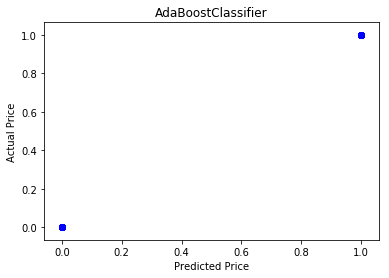

Score of GaussianNB for training set: 0.9992.
Score of GaussianNB for test set: 0.9992.
Precision: 0.9994152958602947
Recall: 0.9989869472043639
[[50282    30]
 [   52 51278]]


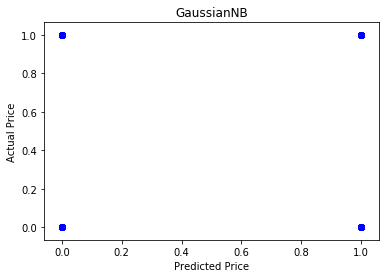

Score of KNeighborsClassifier for training set: 0.9595.
Score of KNeighborsClassifier for test set: 0.9261.
Precision: 0.9216056034482759
Recall: 0.9330605883498928
[[46238  4074]
 [ 3436 47894]]


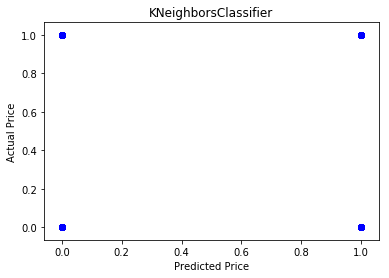

/home/xavient/Desktop/manoj/python/globalenv/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Score of LogisticRegression for training set: 0.9244.
Score of LogisticRegression for test set: 0.9251.
Precision: 0.9233883465055013
Recall: 0.9286771868303136
[[46357  3955]
 [ 3661 47669]]


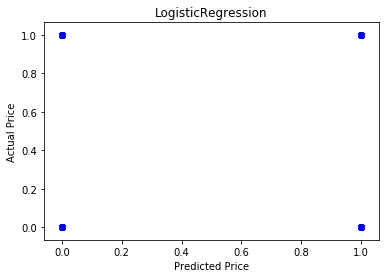

In [ ]:
#Initializing dimensionality reductions
pca = PCA()

X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)  
for clf in clfs:
    clf.fit(X_train, y_train)
    print("Score of {} for training set: {:.4f}.".format(clf.__class__.__name__, accuracy_score(y_train, clf.predict(X_train))))
    print("Score of {} for test set: {:.4f}.".format(clf.__class__.__name__, accuracy_score(y_test, clf.predict(X_test))))
    y_pred = clf.predict(X_test)
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    plt.scatter(y_pred, y_test, alpha=.7, color='b') #alpha helps to show overlapping data
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('{}'.format(clf.__class__.__name__))
    plt.show()